In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation, writers
from celluloid import Camera
import geopandas as gpd
from shapely.geometry import LineString
import cartopy.crs as ccrs


airports = pd.read_csv("airports.txt", delimiter=',', names=['id', 'name', 'city', 'country', 'iata',
                                                                   'icao', 'lat', 'long', 'altitude', 'timezone',
                                                                   'dst', 'tz', 'type', 'source'])
# print(airports)

In [286]:
airports

id                                         name          city  \
0         1                               Goroka Airport        Goroka   
1         2                               Madang Airport        Madang   
2         3                 Mount Hagen Kagamuga Airport   Mount Hagen   
3         4                               Nadzab Airport        Nadzab   
4         5  Port Moresby Jacksons International Airport  Port Moresby   
...     ...                                          ...           ...   
7693  14106                          Rogachyovo Air Base        Belaya   
7694  14107                        Ulan-Ude East Airport      Ulan Ude   
7695  14108                         Krechevitsy Air Base      Novgorod   
7696  14109                  Desierto de Atacama Airport       Copiapo   
7697  14110                           Melitopol Air Base     Melitopol   

               country iata  icao        lat        long  altitude timezone  \
0     Papua New Guinea  GKA  AYGA  -6.081690  145.391998      5282       10   
1     Papua New Guinea  MAG  AYMD  -5.207080  145.789001        20       10   
2     Papua New Guinea  HGU  AYMH  -5.826790  144.296005      5388       10   
3     Papua New Guinea  LAE  AYNZ  -6.569803  146.725977       239       10   
4     Papua New Guinea  POM  AYPY  -9.443380  147.220001       146       10   
...                ...  ...   ...        ...         ...       ...      ...   
7693            Russia   \N  ULDA  71.616699   52.478298       272       \N   
7694            Russia   \N  XIUW  51.849998  107.737999      1670       \N   
7695            Russia   \N  ULLK  58.625000   31.385000        85       \N   
7696             Chile  CPO  SCAT -27.261200  -70.779198       670       \N   
7697           Ukraine   \N  UKDM  46.880001   35.305000         0       \N   

     dst                    tz     type       source  
0      U  Pacific/Port_Moresby  airport  OurAirports  
1      U  Pacific/Port_Moresby  airport  OurAirports  
2      U  Pacific/Port_Moresby  airport  OurAirports  
3      U  Pacific/Port_Moresby  airport  OurAirports  
4      U  Pacific/Port_Moresby  airport  OurAirports  
...   ..                   ...      ...          ...  
7693  \N                    \N  airport  OurAirports  
7694  \N                    \N  airport  OurAirports  
7695  \N                    \N  airport  OurAirports  
7696  \N                    \N  airport  OurAirports  
7697  \N                    \N  airport  OurAirports  

[7698 rows x 14 columns]

In [285]:
countries = pd.read_csv("countries_LATLON.txt", delimiter='\t', names=['country', 'lat', 'lon', 'name'])
countries

country        lat        lon                  name
0        AD  42.546245   1.601554               Andorra
1        AE  23.424076  53.847818  United Arab Emirates
2        AF  33.939110  67.709953           Afghanistan
3        AG  17.060816 -61.796428   Antigua and Barbuda
4        AI  18.220554 -63.068615              Anguilla
..      ...        ...        ...                   ...
240      YE  15.552727  48.516388                 Yemen
241      YT -12.827500  45.166244               Mayotte
242      ZA -30.559482  22.937506          South Africa
243      ZM -13.133897  27.849332                Zambia
244      ZW -19.015438  29.154857              Zimbabwe

[245 rows x 4 columns]

In [181]:
#Spreading animation from a random point

X=airports['long']
Y=airports['lat']

XY = list(zip(X, Y))
random_select = random.choice(XY)

def dist(XY1, XY2):
    distance = np.sqrt((XY1[0]-XY2[0])**2+(XY1[1]-XY2[1])**2)
    return distance

dist_list = []
    
for i in range(len(XY)):
    dist_list.append(dist(random_select, XY[i]))
        
d = {'X': X, 'Y': Y, 'dist': dist_list}
data = pd.DataFrame(data=d)
data = data.sort_values(by=['dist'])
new_X = data['X'].tolist()
new_Y = data['Y'].tolist()

#Making the length of the list from 7698 to 7700
new_X.append(new_X[-1])
new_X.append(new_X[-1])
new_Y.append(new_Y[-1])
new_Y.append(new_Y[-1])

In [301]:
# d = {'LAT': countries['lat'], 'LON': countries['lon'], 'country':airports['country'].value_counts().tolist()}
# pd.DataFrame(data=d)
df = pd.DataFrame(data=airports['country'].value_counts())
df.columns = ['counts']
# df.set_index()
df

counts
United States    1512
Canada            430
Australia         334
Russia            264
Brazil            264
...               ...
Anguilla            1
Isle of Man         1
Macau               1
Jersey              1
Wake Island         1

[237 rows x 1 columns]

In [287]:
airports['country'].value_counts()

United States    1512
Canada            430
Australia         334
Russia            264
Brazil            264
                 ... 
Anguilla            1
Isle of Man         1
Macau               1
Jersey              1
Wake Island         1
Name: country, Length: 237, dtype: int64

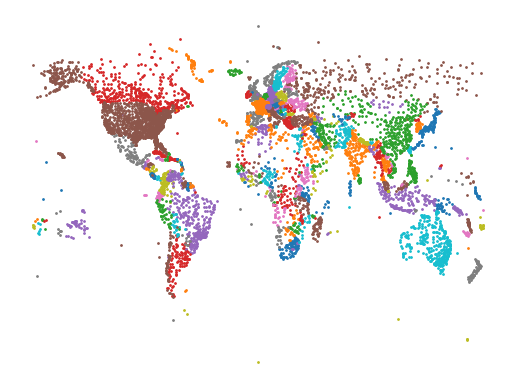

In [277]:
for country in countries:
    y=airports[airports['country']==country]['lat']
    x=airports[airports['country']==country]['long']
    plt.scatter(x,y,s=1)
    plt.axis('off')
plt.savefig('airportsByCountries')

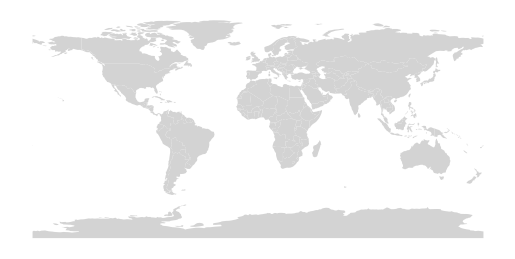

In [332]:
countries2 = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))

countries2.plot(color="lightgrey")
plt.axis('off')
plt.savefig('worldmap.jpg')

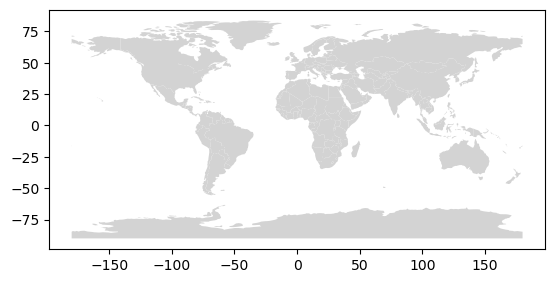

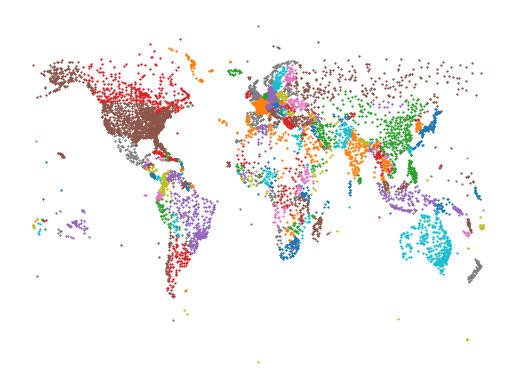

In [335]:
# fig = plt.figure()
camera = Camera(fig)
countries2.plot(color="lightgrey")
# img = plt.imread("worldmap.jpg")
fig, ax = plt.subplots()

# ax.imshow(img)

countries = airports['country'].unique()
for i in range(79):
    for country in countries[i*3:(i*3+3)]:
        y=airports[airports['country']==country]['lat'].tolist()
        x=airports[airports['country']==country]['long'].tolist()
#         countries2.plot(color="lightgrey")
        ax.plot(x,y,ls='none',marker='*',markersize=1)#,color='deepskyblue')
        plt.axis('off')
        camera.snap()

anim = camera.animate()
anim.save('AirportsWorld2.gif')
plt.savefig('airportsByCountries')

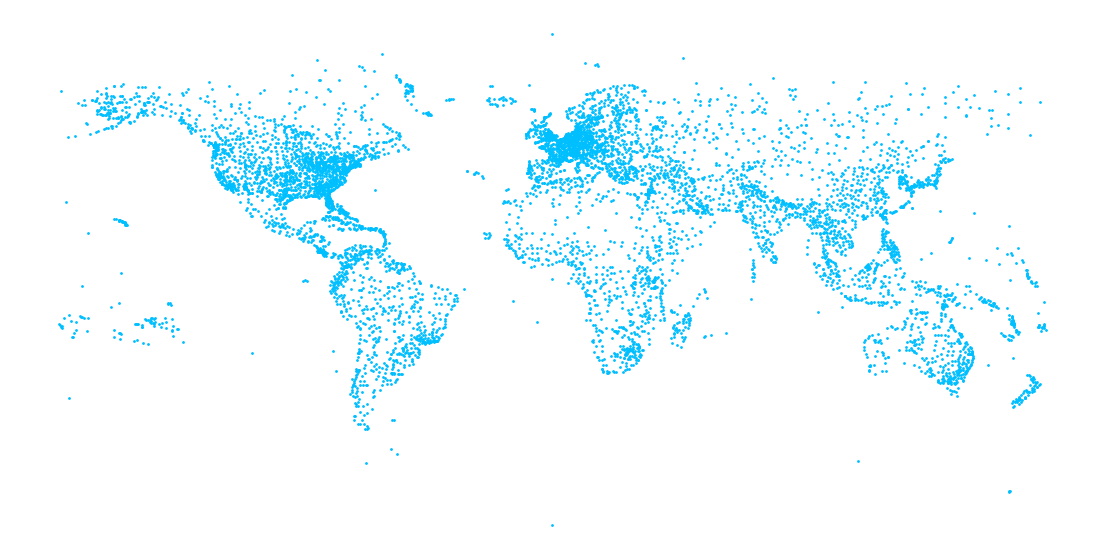

In [323]:
fig = plt.figure(figsize=(14,7))
camera = Camera(fig)
x_total=[]
y_total=[]
countries = airports['country'].unique()
for country in countries:
    y=airports[airports['country']==country]['lat'].tolist()
    x=airports[airports['country']==country]['long'].tolist()
    x_total = x_total + x
    y_total = y_total + y
    plt.scatter(x_total,y_total,s=1,color='deepskyblue')
    plt.axis('off')
    camera.snap()
anim = camera.animate()
anim.save('Airports_by_countries.gif')

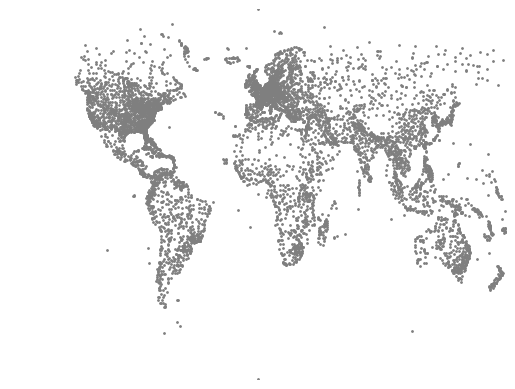

In [337]:
fig = plt.figure()
camera = Camera(fig)

plt.xlim(X.min(), X.max())
plt.ylim(Y.min(), Y.max())
plt.axis('off')

for i in range(77//2):
    plt.scatter(new_X[0:i*200], new_Y[0:i*200], s=1)
    plt.axis('off')
    camera.snap()
        
anim = camera.animate()
anim.save('Spreading_Airports.gif')

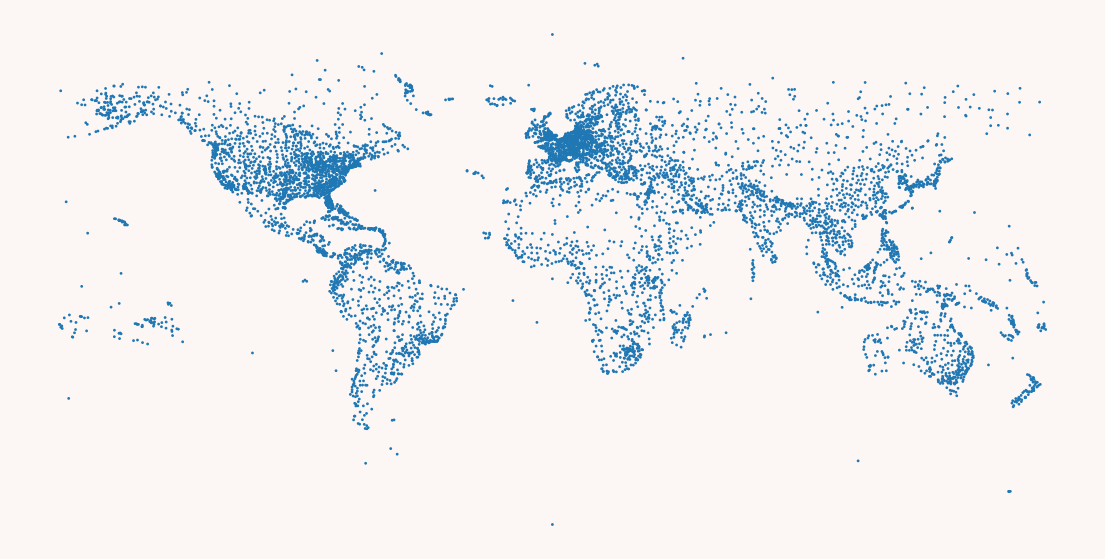

In [219]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
# countries.plot(color="lightgrey")
ax.scatter(airports['long'], airports['lat'], s=4, alpha=1, edgecolors='none')
ax.axis('off')
plt.savefig('airports')
plt.show()

In [79]:
routes = pd.read_csv("routes.txt", delimiter=',', names=['airline', 'id', 'source_airport', 'source_airport_id',
                                                               'destination_airport', 'destination_airport_id', 'codeshare',
                                                               'stops', 'equitment'])

In [11]:
source_airports = airports[['name', 'iata', 'icao', 'lat', 'long']]
destination_airports = source_airports.copy()
source_airports.columns = [str(col) + '_source' for col in source_airports.columns]
destination_airports.columns = [str(col) + '_destination' for col in destination_airports.columns]

In [282]:
routes = routes[['source_airport', 'destination_airport']]
routes = pd.merge(routes, source_airports, left_on='source_airport', right_on='iata_source')
routes = pd.merge(routes, destination_airports, left_on='destination_airport', right_on='iata_destination')

In [82]:
geometry = [LineString([[routes.iloc[i]['long_source'], routes.iloc[i]['lat_source']], [routes.iloc[i]['long_destination'], routes.iloc[i]['lat_destination']]]) for i in range(routes.shape[0])]
routes = gpd.GeoDataFrame(routes, geometry=geometry, crs='EPSG:4326')

C:\Users\12har\anaconda3\lib\site-packages\matplotlib\animation.py:887: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


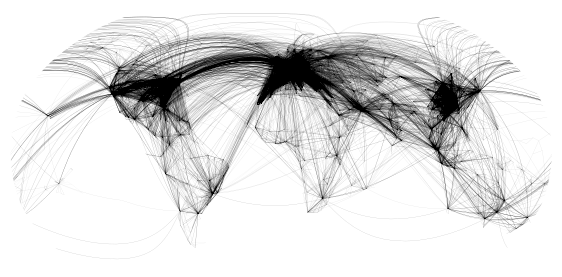

In [281]:
fig = plt.figure(facecolor='white')
ax = plt.axes(projection=ccrs.Robinson())
fig.set_size_inches(7, 3.5)
ax.patch.set_facecolor('white')

routes.plot(ax=ax, transform=ccrs.Geodetic(), color='black', linewidth=0.1, alpha=0.1)

plt.setp(ax.spines.values(), color='white')
plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='white')
ax.set_ylim(-7000000, 8800000)
plt.savefig('routesMap')
plt.show()

In [280]:
len(airports)

7698